## Factor Analysis of Mixed Data

reference: *Practical Guide to Principal Component Methods in R*

### Introduction
>Factor analysis of mixed data (FAMD) is a principal component method dedicated
to analyze a data set containing both quantitative and qualitative variables (Pagès, 2004).

>Quantitative and qualitative variables are normalized during the analysis in order to
balance the influence of each set of variables.

### Computation

#### R packages

In [1]:
library("FactoMineR")
library("factoextra")

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


#### Data format

In [2]:
# use the wine data set
data(wine)
df <- wine[, c(1, 2, 16, 22, 28, 29, 30, 31)]
head(df[, 1:7], 4)

,Label,Soil,Plante,Acidity,Intensity,Harmony,Overall.quality
2EL,Saumur,Env1,2.000,2.107,2.857,3.143,3.393
1CHA,Saumur,Env1,2.000,2.107,2.893,2.964,3.214
1FON,Bourgueuil,Env1,1.750,2.179,3.074,3.143,3.536
1VAU,Chinon,Env2,2.304,3.179,2.462,2.038,2.464


In [3]:
str(df)

'data.frame':	21 obs. of  8 variables:
 $ Label          : Factor w/ 3 levels "Saumur","Bourgueuil",..: 1 1 2 3 1 2 2 1 3 1 ...
 $ Soil           : Factor w/ 4 levels "Reference","Env1",..: 2 2 2 3 1 1 1 2 2 3 ...
 $ Plante         : num  2 2 1.75 2.3 1.76 ...
 $ Acidity        : num  2.11 2.11 2.18 3.18 2.57 ...
 $ Intensity      : num  2.86 2.89 3.07 2.46 3.64 ...
 $ Harmony        : num  3.14 2.96 3.14 2.04 3.64 ...
 $ Overall.quality: num  3.39 3.21 3.54 2.46 3.74 ...
 $ Typical        : num  3.25 3.04 3.18 2.25 3.44 ...


#### R code

In [4]:
res.famd <- FAMD(df, graph = FALSE)
print(res.famd)

*The results are available in the following objects:

  name          description                             
1 "$eig"        "eigenvalues and inertia"               
2 "$var"        "Results for the variables"             
3 "$ind"        "results for the individuals"           
4 "$quali.var"  "Results for the qualitative variables" 
5 "$quanti.var" "Results for the quantitative variables"


### Visualization and interpretation
>To help in the interpretation of FAMD, we highly recommend to read the inter-
pretation of principal component analysis (Chapter 3) and multiple correspondence
analysis (Chapter 5). Many of the graphs presented here have been already described
in our previous chapters.

#### Eigenvalues / Variances

In [5]:
eig.val <- get_eigenvalue(res.famd)
head(eig.val)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,4.8315174,43.922886,43.92289
Dim.2,1.8568797,16.880724,60.80361
Dim.3,1.5824794,14.386176,75.18979
Dim.4,1.1491200,10.446546,85.63633
Dim.5,0.6518053,5.925503,91.56183


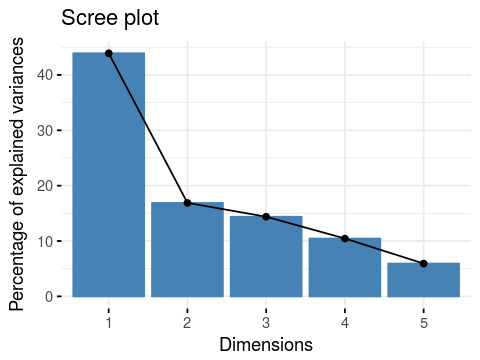

In [6]:
options(repr.plot.width=4, repr.plot.height=3)
fviz_screeplot(res.famd)

#### Graph of variables

##### All variables

In [7]:
var <- get_famd_var(res.famd)
var

FAMD results for variables 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

In [8]:
# Coordinates of variables
head(var$coord)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Plante,0.7344160,0.060551966,0.105902048,0.004011299,0.0010340559
Acidity,0.1732738,0.491118153,0.126394029,0.115376784,0.0045862935
Intensity,0.6991811,0.134639254,0.065382234,0.023214984,0.0064730431
Harmony,0.8943968,0.023628146,0.040124469,0.003653813,0.0086624633
Overall.quality,0.9115699,0.005246728,0.009336677,0.005445276,0.0007961880
Typical,0.7808611,0.027094327,0.001549791,0.083446627,0.0005912942


In [9]:
# Cos2: quality of representation on the factor map
head(var$cos2)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Plante,0.53936692,3.666541e-03,1.121524e-02,1.609052e-05,1.069272e-06
Acidity,0.03002381,2.411970e-01,1.597545e-02,1.331180e-02,2.103409e-05
Intensity,0.48885427,1.812773e-02,4.274836e-03,5.389355e-04,4.190029e-05
Harmony,0.79994566,5.582893e-04,1.609973e-03,1.335035e-05,7.503827e-05
Overall.quality,0.83095973,2.752815e-05,8.717353e-05,2.965103e-05,6.339153e-07
Typical,0.60974400,7.341026e-04,2.401853e-06,6.963340e-03,3.496288e-07


In [10]:
# Contibutions to the dimensions
head(var$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Plante,15.200526,3.2609526,6.69215972,0.3490757,0.15864490
Acidity,3.586323,26.4485720,7.98708850,10.0404466,0.70362936
Intensity,14.471254,7.2508336,4.13163258,2.0202401,0.99309457
Harmony,18.511716,1.2724651,2.53554453,0.3179662,1.32899551
Overall.quality,18.867156,0.2825562,0.59000304,0.4738648,0.12215119
Typical,16.161818,1.4591321,0.09793437,7.2617850,0.09071638


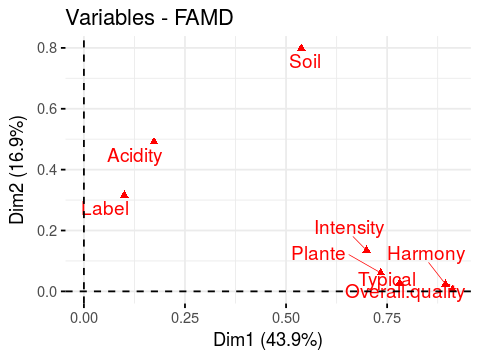

In [11]:
# Plot of variables
fviz_famd_var(res.famd, repel = TRUE)

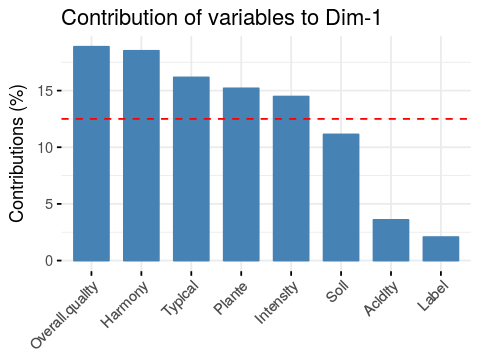

In [12]:
# Contribution to the first dimension
fviz_contrib(res.famd, "var", axes = 1)

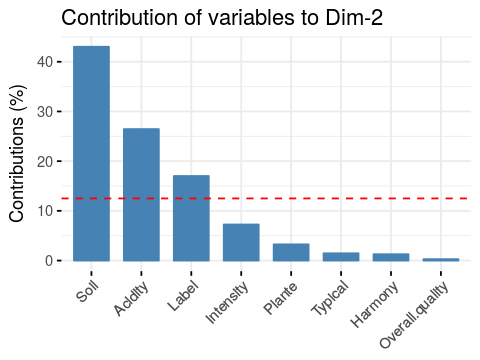

In [13]:
# Contribution to the second dimension
fviz_contrib(res.famd, "var", axes = 2)

>The red dashed line on the graph above indicates the expected average value, If the
contributions were uniform

##### Quantitative variables

In [14]:
quanti.var <- get_famd_var(res.famd, "quanti.var")
quanti.var

FAMD results for quantitative variables 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

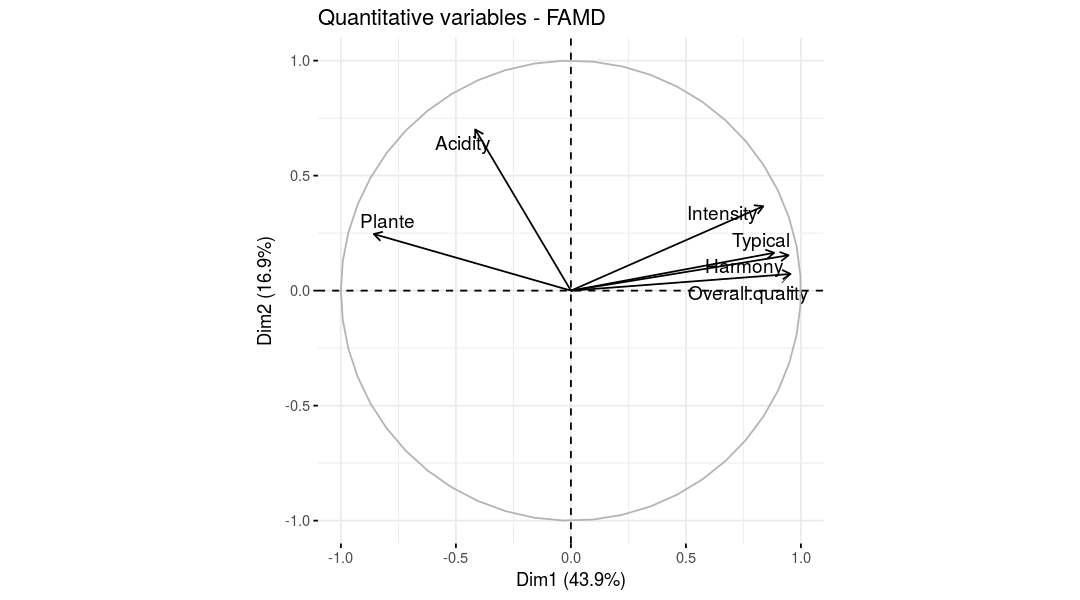

In [15]:
options(repr.plot.width=9, repr.plot.height=5)
fviz_famd_var(res.famd, "quanti.var", repel = TRUE,
             col.var = "black")

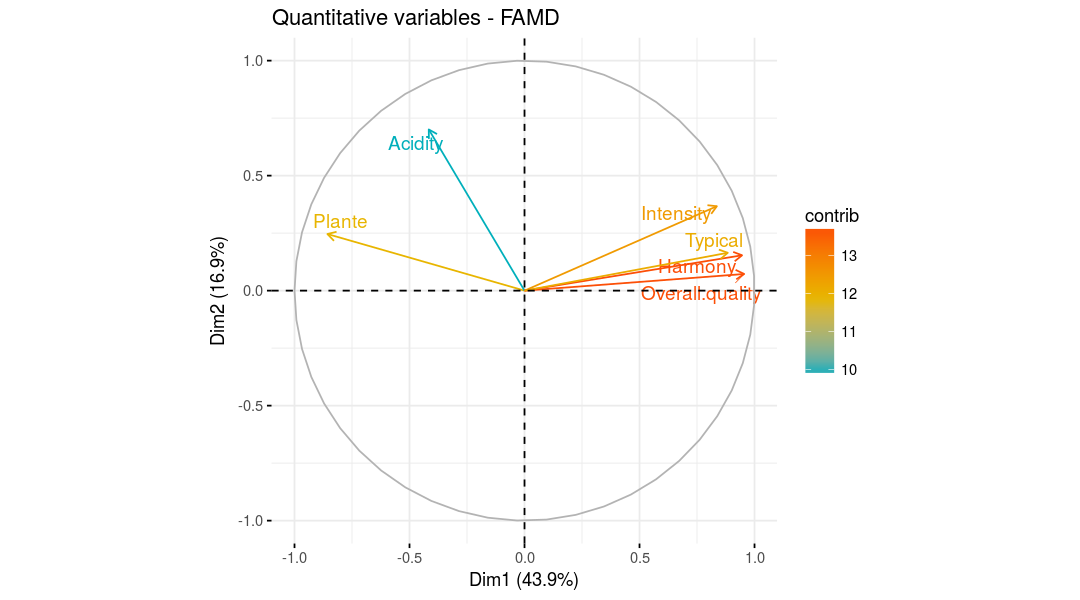

In [16]:
fviz_famd_var(res.famd, "quanti.var", col.var= "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

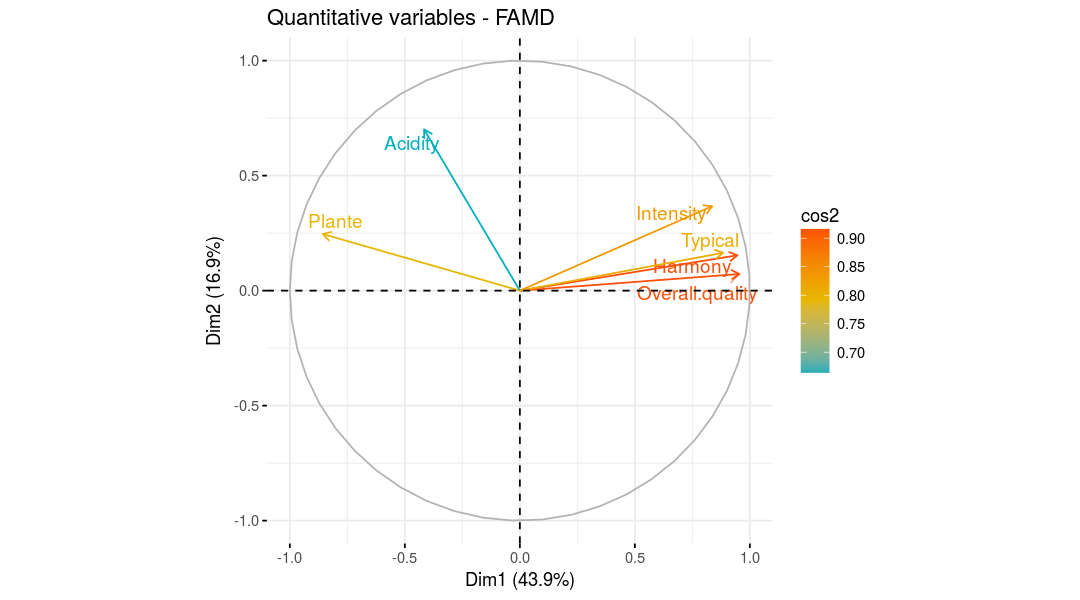

In [17]:
# Color by cos2 values: quality on the factor map
fviz_famd_var(res.famd, "quanti.var", col.var = "cos2", 
              gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
              repel = TRUE)

##### Graph of qualitative variables

In [18]:
quali.var <- get_famd_var(res.famd, "quali.var")
quali.var

FAMD results for qualitative variable categories 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

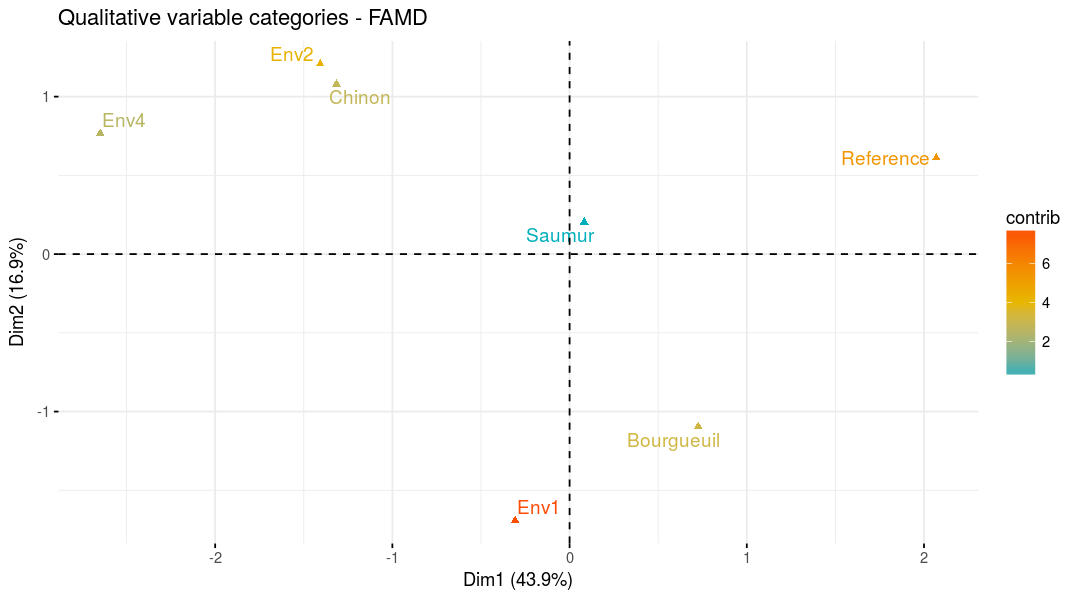

In [19]:
fviz_famd_var(res.famd, "quali.var", col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel =  TRUE)

#### Graph of individuals

In [20]:
ind <- get_famd_ind(res.famd)
ind

FAMD results for individuals 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

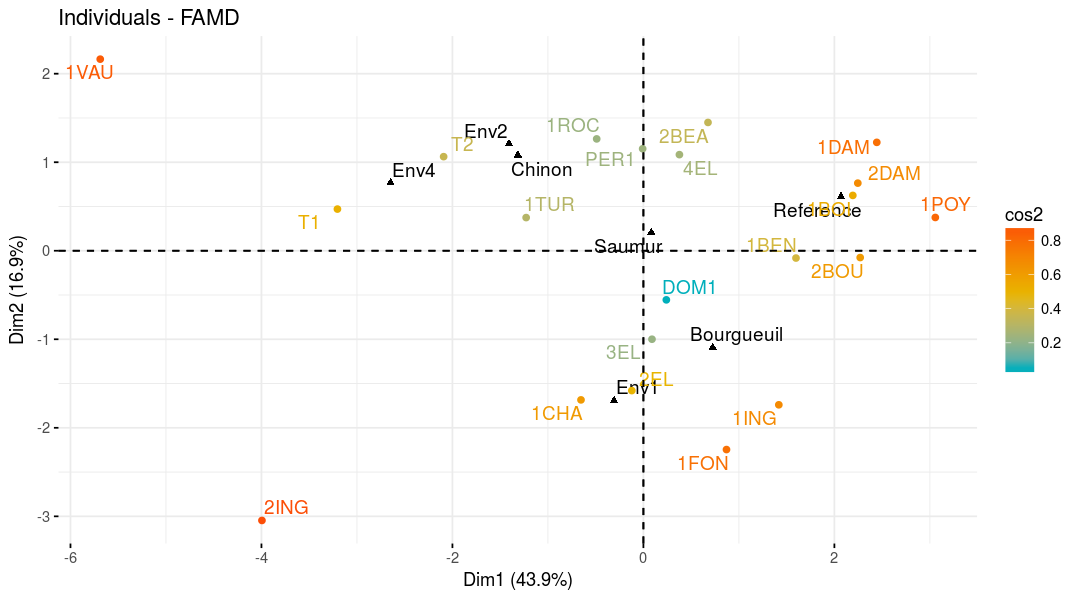

In [21]:
fviz_famd_ind(res.famd, col.ind = "cos2", 
              gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
              repel = TRUE)

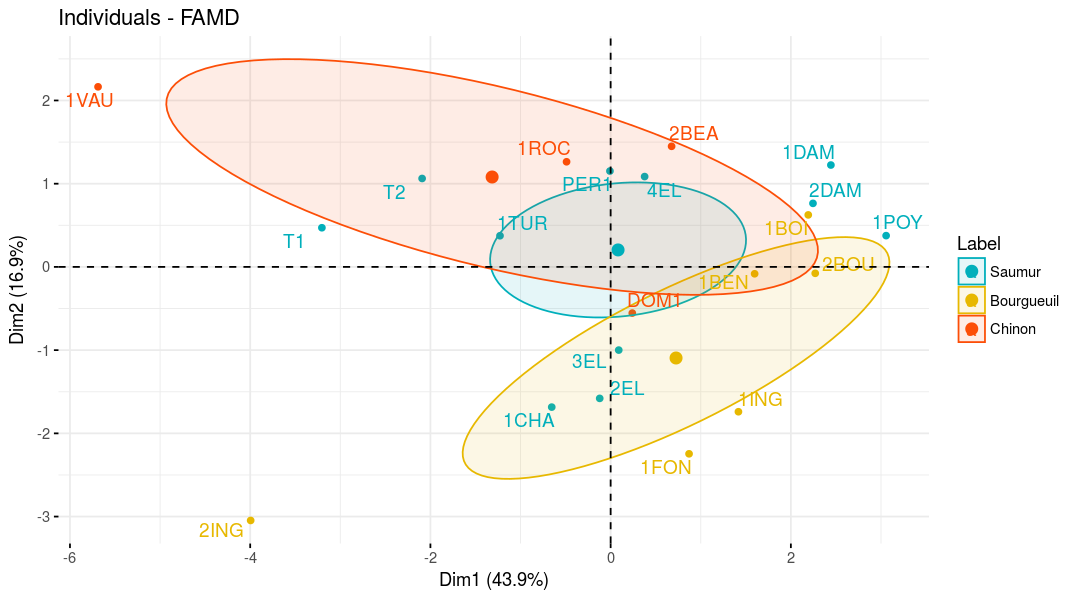

In [24]:
fviz_mfa_ind(res.famd, 
             habillage = "Label", # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, ellipse.type = "confidence",
             repel = TRUE # Avoid text overlapping
            )

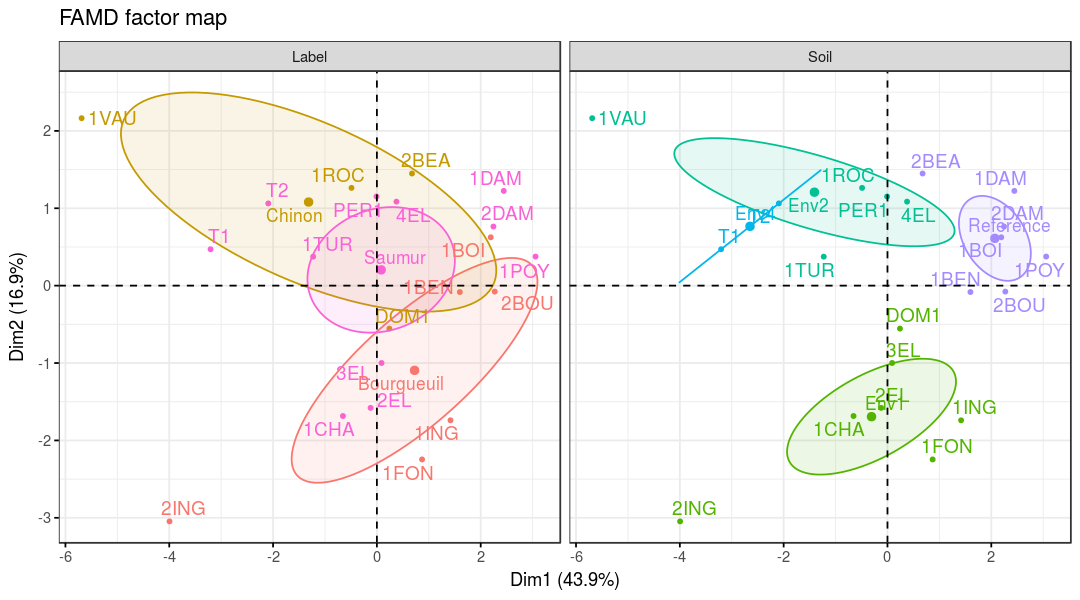

In [25]:
fviz_ellipses(res.famd, c("Label", "Soil"), repel = TRUE)

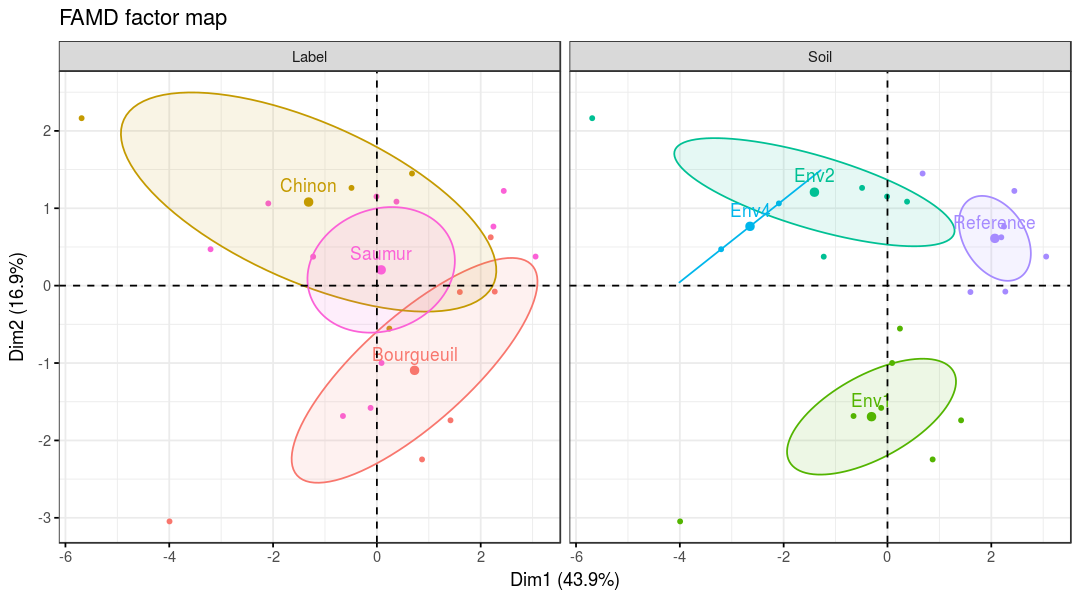

In [26]:
fviz_ellipses(res.famd, 1:2, geom = "point")

### Summary
>The factor analysis of mixed data (FAMD) makes it possible to analyze a data set, in
which individuals are described by both qualitative and quantitative variables. In this ar-
ticle, we described how to perform and interpret FAMD using FactoMineR and factoextra
R packages.